# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# Normal Human Body Temperature

The purpose of this notebook is to analyze human body temperature. The dataset is taken from Mackowiak, P. A., Wasserman, S. S., and Levine, M. M.  (1992), "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich," _Journal of the American Medical Association_, 268, 1578-1580. 

A summary is provided at https://ww2.amstat.org/publications/jse/datasets/normtemp.txt.

## Import Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Open Dataset

In [13]:
df = pd.read_csv('data/human_body_temperature.csv')

## Check Data

In [4]:
df.shape

(130, 3)

130 rows is not substantial, so we will have to be careful using statistics.

In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


Note that the median is 98.25, and the mean is 98.3, both less than 98.6. The proximity of mean and median imply a normal distribution.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


Confirms that the temperature column is a float.

In [16]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


Could males and females have different mean temperatures? We will explore this later on.

## Temperature Graphs

In [28]:
import seaborn as sns
sns.set()

I like using seaborn because of the background grid.

### Histogram

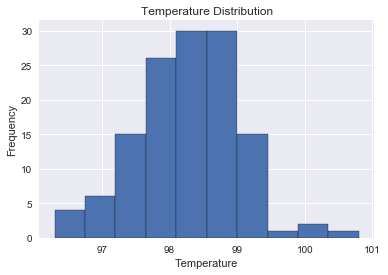

In [27]:
# Plot the histogram with default number of bins.
_= plt.hist(df['temperature'], edgecolor='k')
_= plt.xlabel('Temperature')
_= plt.ylabel('Frequency')
_= plt.title('Temperature Distribution')

# Show the plot
plt.show()

This is close to a normal distribution, although more data points are to the left.

### CDF

In [29]:
#The ecdf function provides the paramaters to plot a cdf
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

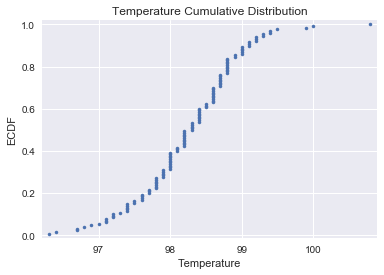

In [31]:
# Compute ECDF for 
x, y = ecdf(df.temperature)

# Generate plot
plt.plot(x, y, marker='.', linestyle='none')

# Make the margins nice
plt.margins(.02)

# Label the axes
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.title('Temperature Cumulative Distribution')

#Show the plot
plt.show()

That is beautifully normal! It looks like there are a few more data points to the left. Note that the CDF is generally a better test for normality since it does not rely on the number of bins.

In [47]:
df[df['temperature'] < df['temperature'].median()].count()

temperature    64
gender         64
heart_rate     64
dtype: int64

Data points to the left of the median are very close to exactly half. For comparison, we can check data points to the right. 

In [49]:
df[df['temperature'] > df['temperature'].median()].count()

temperature    61
gender         61
heart_rate     61
dtype: int64

In [50]:
df[df['temperature'] == df['temperature'].median()].count()

temperature    5
gender         5
heart_rate     5
dtype: int64

Including the 5 points equal to the median, they sum to 130 as expected. The graph is not skewed. We can proceed assuming that our data is approximately normal.

## Independence

We can assume independence since the body temperature of 1 individual presumably has no effect on another.

## Large Counts

Since we have 130>30 samples, the Central Limit Theorem Applies. (Note that our distribution is approximatley normal, so the CLT would apply even if n<30.)

## Hypothesis Tests

Our null hypothesis is that the mean human body temperature is 98.6 as stated by Wunderlich. We will investigate this claim starting with a bootstrap test.

## Bootstrap Test

Bootstrapping means that we will resample our data with replacement and compute the mean each time.

### Define Bootstrap Functions

In [55]:
#Returns the result of a function, like np.mean
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

#Produces desired function, like np.mean, for all replicants of size=x
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

### Bootstrap Temperature Mean

SEM:  0.06405661469519336
STD:  0.06353758864570826


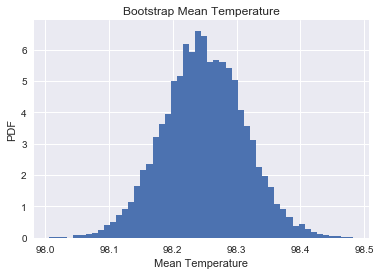

Given our sample, the proability that the mean temperature is 98.6 is  0.0


In [63]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature, np.mean, size=10000)

# Compute and print SEM (Standard Error of the Mean)
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print("SEM: ", sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print("STD: ", bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Mean Temperature')
_ = plt.ylabel('PDF')
_ = plt.title('Bootstrap Mean Temperature')

# Show the plot
plt.show()

#Find the probability of 98.6
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print('Given our sample, the proability that the mean temperature is 98.6 is ', p)

Extraordinary! But how confident are we that the mean presented in the histogram above is accurate?

### Bootstrap Confidence Interval

In [60]:
# This is a 99% Confidence Interval
ci = np.percentile(bs_replicates,[0.5, 99.5])
print("We are 99% confident that the range of ", ci, " captures the true mean.")

We are 99% confident that the range of  [98.08461538 98.41230769]  captures the true mean.


Since 98.6 falls outside of the 99% Confidence Interval, we reject the null hypothesis. The true mean is not 98.6.

## Frequentist Temperature Mean

Let's try the same approach using frequentist methods. Note that a z-score is warranted since our distribution is approximately normal.

### Define z-score / p-value functions

In [80]:
#zscore function for means
def zscore_mean(statistic, parameter, size=1):
    zscore = (statistic - parameter.mean())/(parameter.std()/size**0.5)
    return zscore

#convert zscore to p-value
def pvalue(zscore):
    import scipy.stats as st
    prob = 1 - st.norm.cdf(zscore)
    return prob

### Compute z-score / p-value

In [81]:
zscore = zscore_mean(98.6, df.temperature, 130)
p = pvalue(zscore)
print('z-score: ', zscore)
print('p-value: ', p)

z-score:  5.454823292364079
p-value:  2.451078506826576e-08


The probability is almost 0! Again, we convincingly reject the null hypothesis. According to our sample, there is a 0.0000000245 percent chance that the mean temperature is 98.6.

In [85]:
pval = st.t.sf(zscore, 129)*2  # two-sided pvalue = Prob(abs(t)>tt)
print(pval)

2.4106320415609943e-07
